In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy.signal import butter, filtfilt
from scipy.io.wavfile import write

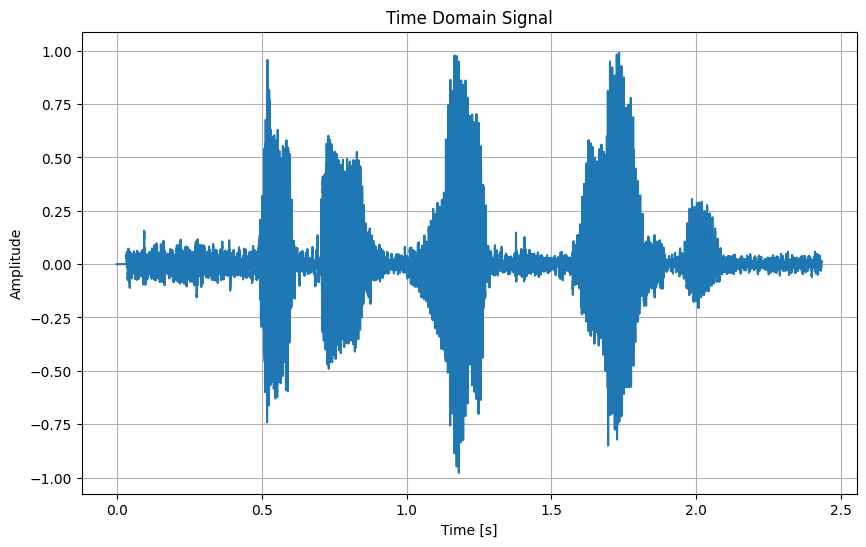

In [93]:
# TASK - 1 - LOADING THE WAV FILE AND PLOTTING GRAPHS

# Step 1: Load the audio file
file_path = "Lab 1 test 2.wav"  # file path
sampling_rate, audio_data = wavfile.read(file_path)

# Step 2: Normalize the audio data to be between -1 and +1
audio_data_norm = audio_data /32756 #np.max(np.abs(audio_data), axis=0)

# Step 3: Create a time axis
time = np.linspace(0, len(audio_data_norm) / sampling_rate, num=len(audio_data_norm))

# Step 4: Plot the time-domain signal
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data_norm)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.grid(True)
plt.show()

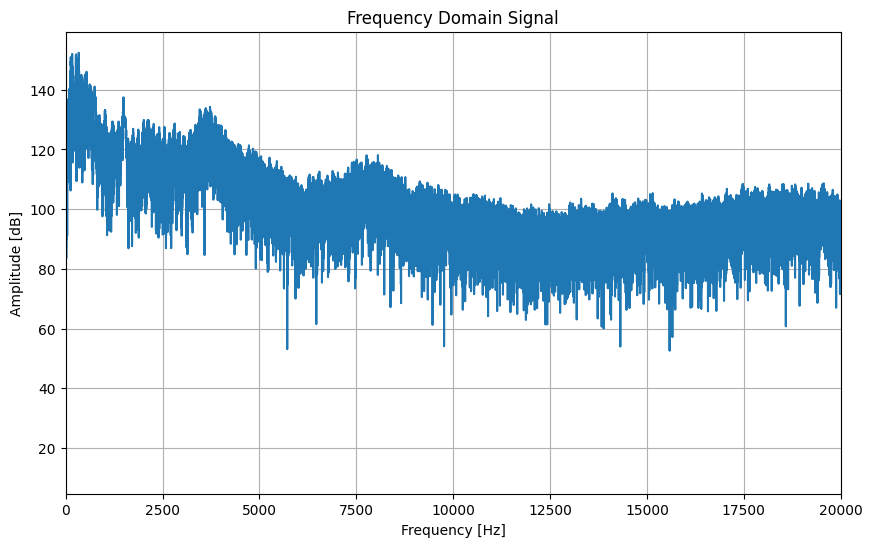

In [100]:
# Step 5: Perform the FFT (Fast Fourier Transform)
fft_data = np.fft.fft(audio_data)
fft_freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

N = len(audio_data)
xfreq = fft_freq[:N//2]
yfreq = np.abs(fft_data[:N//2])

# Step 6: Plot the frequency-domain signal
plt.figure(figsize=(10, 6))
plt.plot(xfreq, 20 * np.log10(np.abs(yfreq)))  # Using dB scale
plt.xlim(0, 20000)  # Limiting the frequency range to 20kHz
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.title('Frequency Domain Signal')
plt.grid(True)
plt.show()

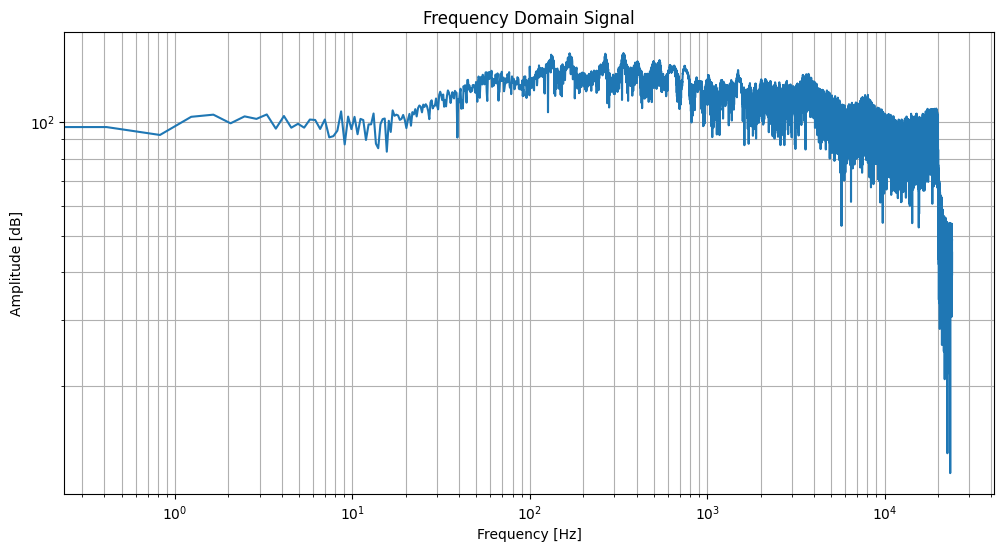

In [119]:
# Step 5: Perform the FFT (Fast Fourier Transform)
fft_data = np.fft.fft(audio_data)
N = len(audio_data)
fft_freq = np.fft.fftfreq(N, d=1/sampling_rate)
#magnitude = np.abs(fft_data) / N

#N = len(audio_data)
xfreq = fft_freq[:N//2]
magnitude = np.abs(fft_data[:N//2])
ymag = 20*np.log10(magnitude)
# Step 4: Take only the positive frequencies and corresponding magnitudes
#positive_frequencies = fft_freq[:N//2]  # Only take positive frequencies
#positive_magnitude = magnitude[:N//2]  # Only take corresponding magnitude

# Step 6: Plot the frequency-domain signal
plt.figure(figsize=(12, 6))
plt.loglog(xfreq,ymag,base=10)
#plt.loglog(positive_frequencies, positive_magnitude)
#plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_data)[:len(fft_freq)//2])
#plt.loglog(xfreq, 20 * np.log10(np.abs(yfreq)))  # Using dB scale
#plt.xlim(0, 20000)  # Limiting the frequency range to 20kHz
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]' )
plt.title('Frequency Domain Signal')
plt.grid(True, which = "both")
plt.show()